In [1]:
from sqlalchemy import create_engine, text, MetaData, Table, Column, func, select, distinct
from sqlalchemy.dialects import postgresql
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import random

In [2]:
def prettify_name(name: str) -> str:
    if not name:
        return 'Other'
    return ' '.join([partial_name.capitalize() for partial_name in name.split('_')])

In [3]:
DB_USER = 'postgres'
DB_PASSWORD = 'admin'
DB_NAME = 'metacrawler_prod'
DB_PORT = 5432
DB_HOST = '10.40.161.234'
pg_engine = create_engine(f'postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}')

In [4]:
query = '''
        select
            distinct tab0.website,
            tab1.company_name,
            tab0.locations,
            tab1.top_level_industry
        from
            sdr_uploadpage tab0
        join sdr_zoominfo_company tab1 on
            tab0.website = tab1.company_domain
        where
            tab0.verified_source = 'ZOOMINFO'
    '''

In [5]:
df = pd.read_sql(query, con=pg_engine)\
       .explode('locations')\
       .explode('top_level_industry')
df = df.rename(columns={'locations': 'location', 'company_name': 'name', 'top_level_industry': 'industry'})
df['location'] = df['location'].map(lambda x: prettify_name(x))

## LOCATION

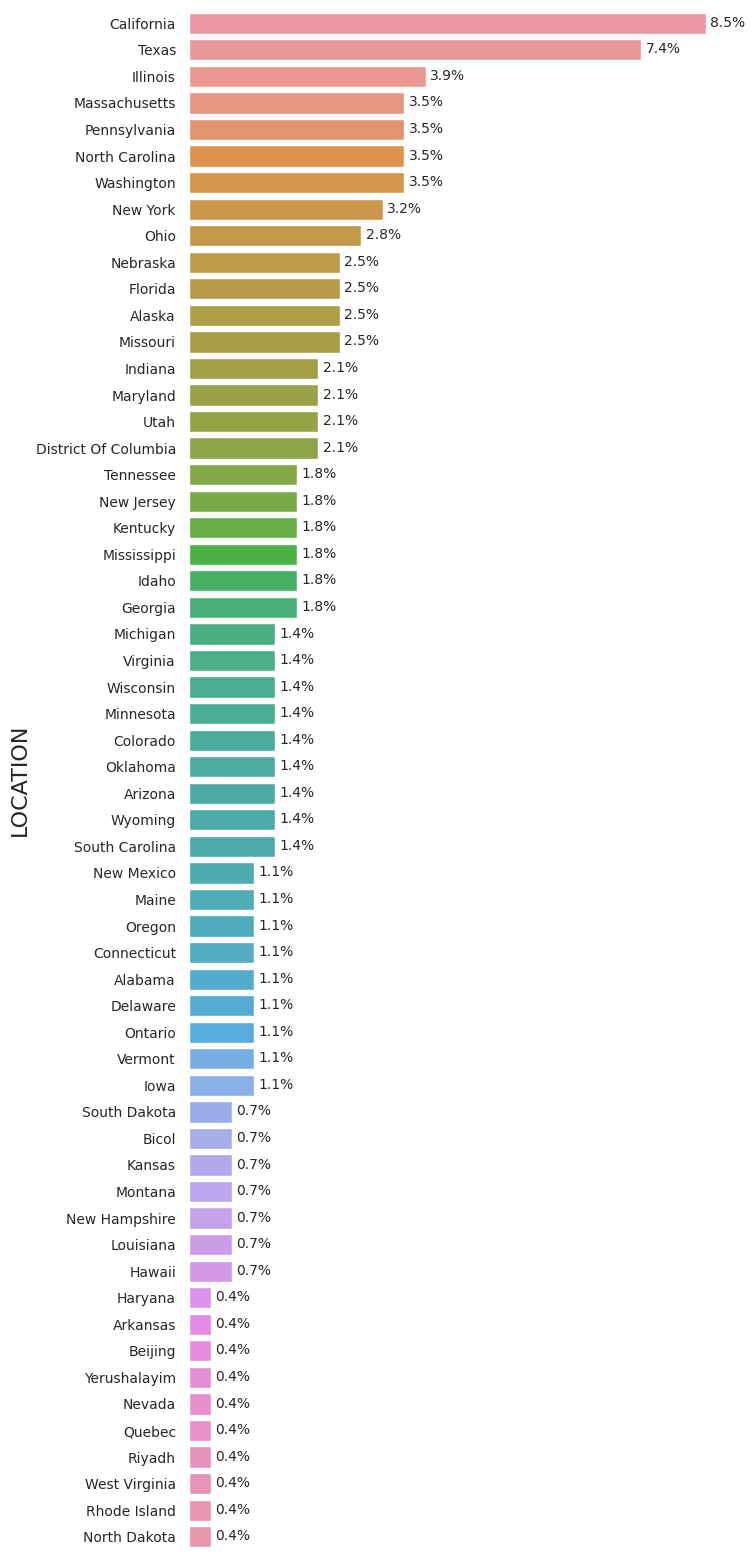

In [6]:
# Bar chart
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_context('notebook')
fig, ax = plt.subplots(figsize=(7, 20))
[ax.spines[direction].set_visible(False) for direction in ('right', 'left', 'top', 'bottom')]
sns.countplot(y="location", data=df, orient='h', order=df['location'].value_counts().index)
total = len(df['website'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 0.2
    y = p.get_y() + p.get_height() / 1.5
    ax.annotate(percentage, (x, y), fontsize=10)
plt.yticks(fontsize=10)
plt.xticks([])
plt.ylabel('LOCATION',fontsize=16)
plt.xlabel('')
plt.show()

/tmp/ipykernel_89320/805829695.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_series = plot_series.append(pd.Series({'Others': 100 - plot_series.sum()}))


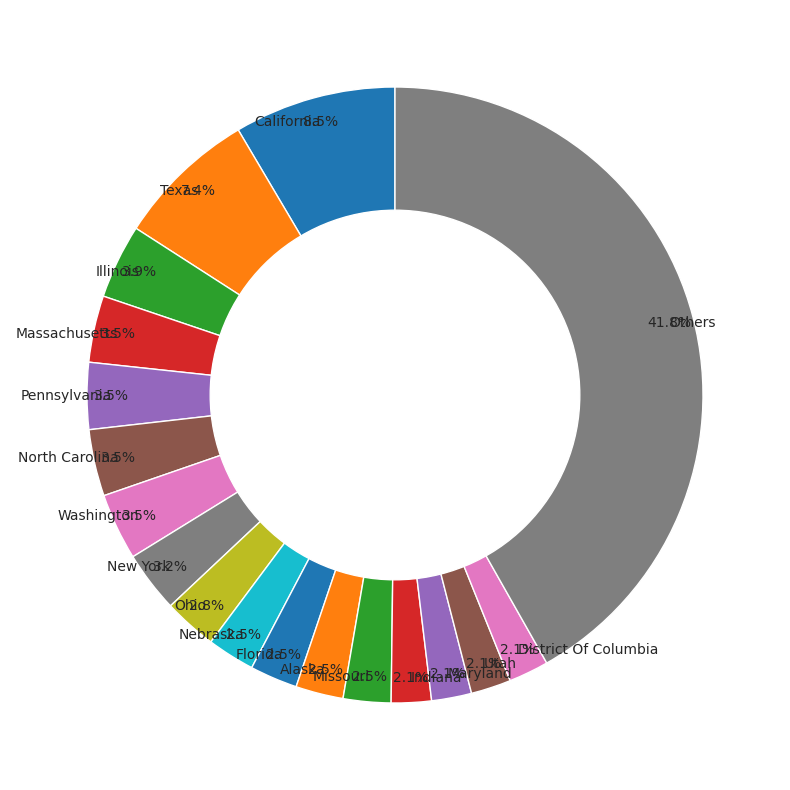

In [44]:
# Pie chart
cnt = df['location'].value_counts(normalize=True).round(3) * 100
plot_series = cnt.loc[lambda x: x > 2]
plot_series = plot_series.append(pd.Series({'Others': 100 - plot_series.sum()}))
plot_series.plot.pie(figsize=(10, 10), autopct='%1.1f%%', fontsize=10, startangle=90, pctdistance=0.92, labeldistance=0.92)
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig = plt.gcf()
plt.ylabel('')
plt.show()

## INDUSTRY

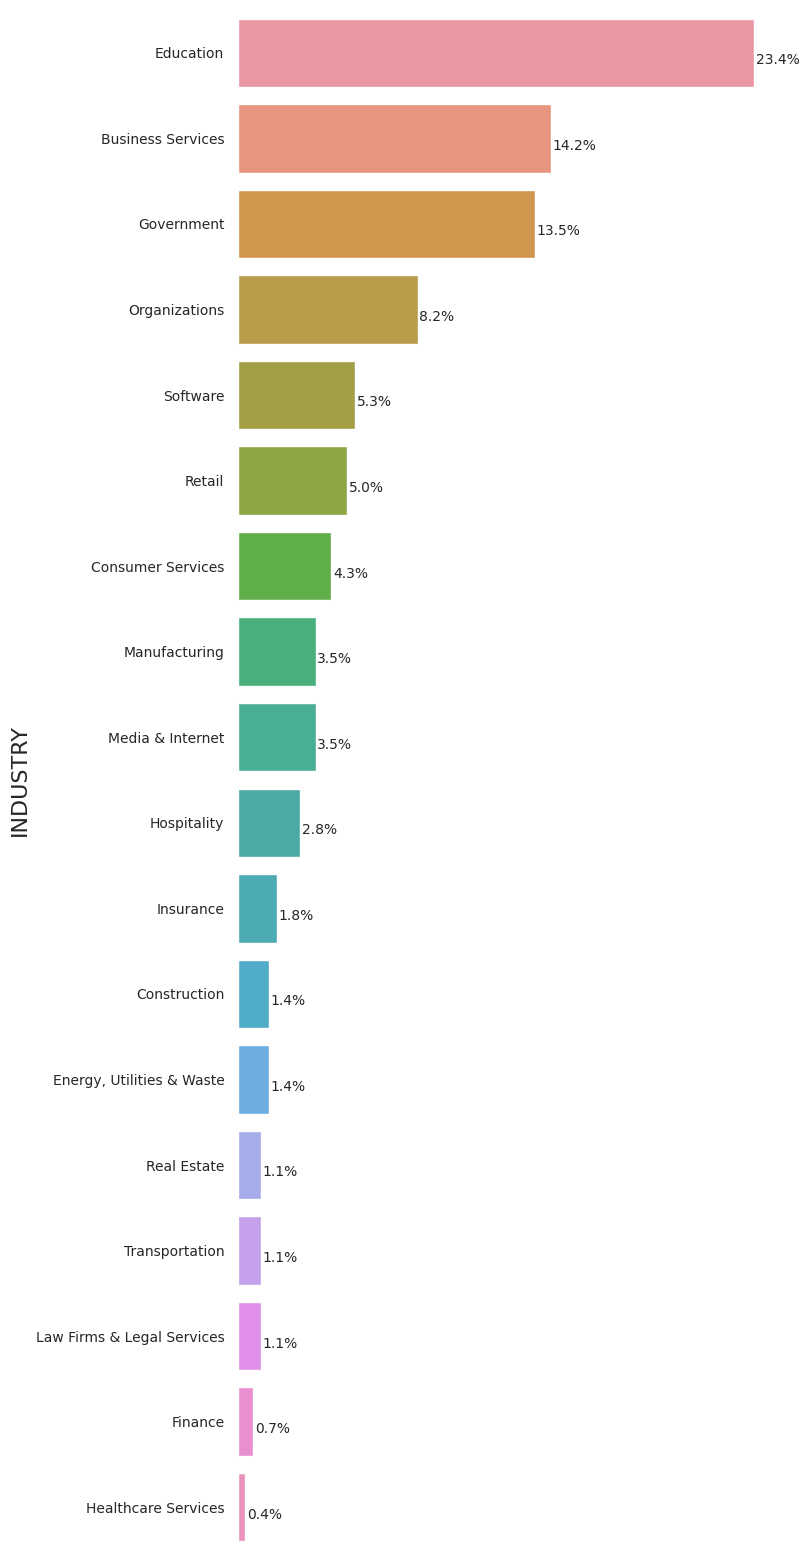

In [9]:
# Bar chart
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_context('notebook')
fig, ax = plt.subplots(figsize=(7, 20))
[ax.spines[direction].set_visible(False) for direction in ('right', 'left', 'top', 'bottom')]
sns.countplot(y="industry", data=df, orient='h', order=df['industry'].value_counts().index)
total = len(df['industry'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 0.2
    y = p.get_y() + p.get_height() / 1.5
    ax.annotate(percentage, (x, y), fontsize=10)
plt.yticks(fontsize=10)
plt.xticks([])
plt.ylabel('INDUSTRY',fontsize=16)
plt.xlabel('')
plt.show()

/tmp/ipykernel_89320/2691484564.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_series = plot_series.append(pd.Series({'Others': 100 - plot_series.sum()}))


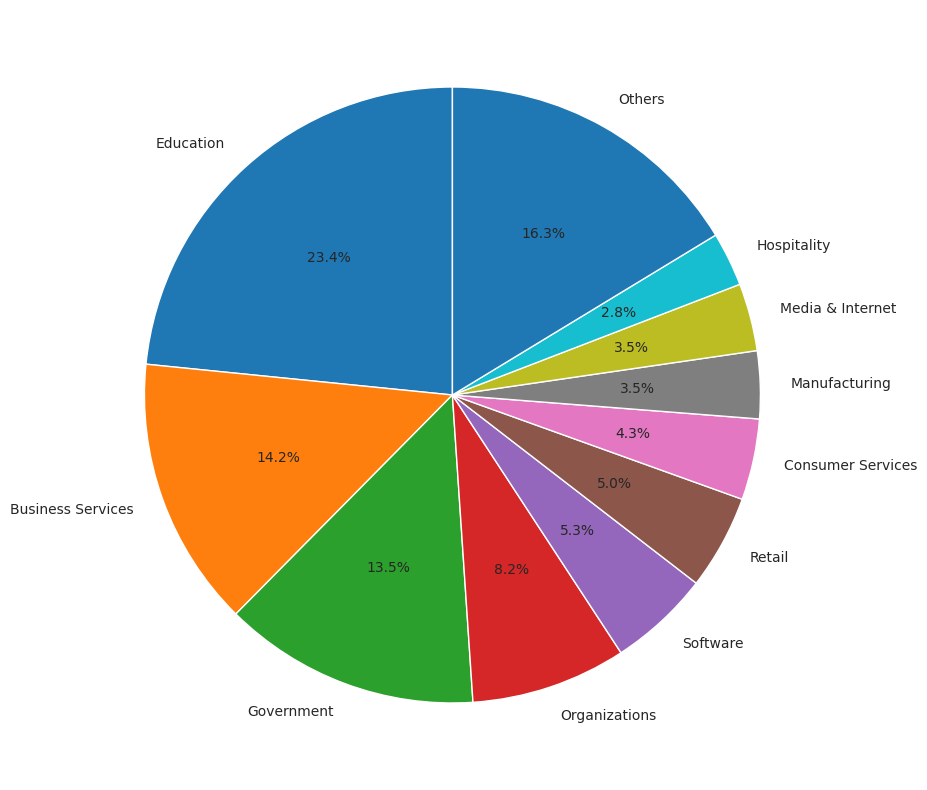

In [18]:
# Pie chart
total = len(df['industry'])
cnt = (df['industry'].value_counts() / total) * 100
plot_series = cnt.loc[lambda x: x > 2]
plot_series = plot_series.append(pd.Series({'Others': 100 - plot_series.sum()}))
colors = random.choices(list(mcolors.CSS4_COLORS.values()), k=len(plot_series))
plot_series.plot.pie(figsize=(10, 10), autopct='%1.1f%%', fontsize=10, startangle=90)
plt.ylabel('')
plt.show()